### Etivity 3
#### Student ID: 18200036
#### Name: Brian Parle

**Task 4  (CE6002)**
- Copy your linear classification algorithm to the notebook Etivity3_LinearRegression.ipynb available in the git repository. Change your linear classification algorithm to make it suitable for linear regression. Use this to obtain the best possible fit to the data set Task4.csv. Your regression performance should improve if you add some new features.
- Also, use an algorithm from the scikit-learn toolbox to see if you can do better. You should not add any other imports than those necessary for your chosen scikit-learn algorithm.

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.datasets.samples_generator import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
def bp_LinearClassification(X_in, y_in):
    """
    Process the fit function and utilise sign to perform Linear Classification

    Format X to be a vector of the input values x with x0=1 bias coordinate
    Format y to be the target vector of inputs y

    Calculate X+ = (XTX)-1 XT

    Return x = X+ y
    """

    print('NOTE: This function produces errors for some matrices - use bp_LinearClassification_simplified')
    return
    w = []

    #reshape the input values
    #X_in has samples in rows - we add a column of ones
    X = X_in
    y = y_in
    print(X.shape)

    ones = np.ones(X.shape[0]).reshape(-1,1)
    print(ones)
    X = np.concatenate((ones, X), axis=1)
    print(X)
    
    XT = X.T
    XTX= XT.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    X_dagger= XTX_inv.dot(XT)
    
    #check arrays before calculation
    print('XT\n', XT)
    print('XTX\n', XTX)
    print('XTX_inv\n', XTX_inv)
    print('y\n',y)
    print('X_dagger\n',X_dagger)
    #X_dagger = X_dagger.transpose()
    print('X_dagger\n',X_dagger)

    w = X_dagger.dot(y)
    #finished so return the the signs of the weights
    return w

def bp_LinearRegression(X, y):
    X_inverse = np.linalg.pinv(X)
    w = np.matmul(X_inverse, y)
    return w

def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [pointOnBoundary(x_min), pointOnBoundary(x_max)]

def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

def calculate_lin_class_and_plot_data(X, y, experiment):

    weights = bp_LinearRegression(X, y)

    #apply classification
    y_predict = np.sign(X.dot(weights))

    plt.scatter(X[:,1], X[:,2], c=y)
    minx = min(X[:,1:2])
    maxx = max(X[:,1:2])
    plt.plot([minx, maxx], [point_on_boundary(weights, minx), point_on_boundary(weights, maxx)])
    plt.title(experiment + '- actual.')
    plt.show()

    plt.scatter(X[:,1], X[:,2], c=y_predict)
    plt.title(experiment + '- predicted.')
    plt.plot([minx, maxx], [point_on_boundary(weights, minx), point_on_boundary(weights, maxx)])
    plt.show()
       
    return weights, y_predict


def calculate_MSE(a, b):
    #calculate the sum of square errors
    sum_square_diff = 0
    N = len(a)
    for i in range(N):
        sum_square_diff += (a[i] - b[i]) ** 2
    square_error = sum_square_diff / N
    return square_error
 

In [7]:
#import the data, setting the most appropriate datatype
df = pd.read_csv("./task4.csv")
df.describe(include='all')
df.dtypes

X    float64
y    float64
dtype: object

In [8]:
df.head(10)

,X,y
0,0.0000,-0.3080
1,0.0101,-0.3470
2,0.0202,-0.0937
3,0.0303,-0.2860
4,0.0404,-0.0927
5,0.0505,-0.0335
6,0.0606,-0.0472
7,0.0707,-0.0789
8,0.0808,0.1460
9,0.0909,0.2380


In [39]:
X = np.array(df['X'])
y = np.array(df['y'])

X = X.reshape(-1,1)
y = y.reshape(-1,1)

#Add a bias column
ones = np.ones(X.shape[0]).reshape(-1,1)
X_bias = np.concatenate((ones, X), axis=1)

#split into train and test sets (automatically shuffles the data)
X_train, X_test, y_train, y_test = train_test_split(X_bias, y, test_size=0.3, random_state=39)


In [54]:
#Train the Linear Regression Model
weights = bp_LinearRegression(X_train, y_train)

#Calculate Ein
y_train_predict = X_train.dot(weights)
Ein = calculate_MSE(y_train, y_train_predict)
print ('Ein = ',Ein)

#Test the model and calculate Eout
y_test_predict = X_test.dot(weights)
#Calculate Eout
Eout = calculate_MSE(y_test, y_test_predict)
print ('Eout = ',Eout)


Ein =  [0.11057765]
Eout =  [0.08906311]


In [56]:
#Try to improve the model by adding features: X^2
X_bias_2 = np.insert(X_bias, 2, 0, axis=1)
X_bias_2[:,2] = X_bias_2[:,1] * X_bias_2[:,1]
#print(X_bias[0:10,:])
#print(X_bias_2[0:10,:])

#split into train and test sets (automatically shuffles the data)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_bias_2, y, test_size=0.3, random_state=39)


In [59]:
#Train the Linear Regression Model
weights = bp_LinearRegression(X_train_2, y_train_2)

#Calculate Ein
y_train_2_predict = X_train_2.dot(weights)
Ein_2 = calculate_MSE(y_train_2, y_train_2_predict)
print ('Ein_2 = ',Ein)

#Test the model and calculate Eout
y_test_2_predict = X_test_2.dot(weights)
#Calculate Eout
Eout_2 = calculate_MSE(y_test_2, y_test_2_predict)
print ('Eout_2 = ',Eout)

Ein_2 =  [0.00502029]
Eout_2 =  [0.00496633]


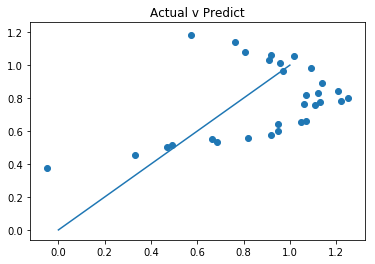

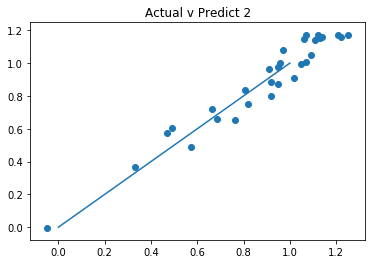

In [63]:
plt.title('Actual v Predict')
plt.scatter(y_test, y_test_predict)
plt.plot(np.arange(y_test_predict.max()))
plt.show()
plt.title('Actual v Predict 2')
plt.scatter(y_test_2, y_test_2_predict)
plt.plot(np.arange(y_test_2_predict.max()))
plt.show()

In [67]:
#Compare performance with SGDRegressor (with added features)

#Seemingly SGD prefers tru matrix inputs

my_sgd = SGDRegressor(alpha=0.0001, learning_rate='invscaling', loss='squared_loss', \
                      max_iter=1000, random_state=None, average=False, penalty=None)
my_sgd.fit(X_train_2, y_train_2)

#score the model using the test dataset
sgd_score = my_sgd.score(X_test_2, y_test_2)
print('Overall score = {}%'.format(round(sgd_score * 100, 2)))
print('feature importances:\n', my_sgd.coef_)

Overall score = 16.1%
feature importances:
 [ 0.16515769  1.1079041  -0.38259734]


/Users/brianparle/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
